# ASR

In [5]:
# from ASRCode.asr import ASR
# !pip install pyriemann

In [4]:
!pip install pyedflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.8 MB/s eta 0:00:00


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyedflib

In [ ]:
raw = np.load('eeg_raw.npy')
sfreq = 250

In [ ]:
raw.shape

(8, 15001)

In [ ]:
# Train on a clean portion of data
asr = ASR(sfreq=sfreq, method='euclid', blocksize=10)
train_idx = np.arange(0 * sfreq, 30 * sfreq, dtype=int)
_, sample_mask = asr.fit(raw[:, train_idx])

[[ 2.87908234e+01 -3.00263170e+00 -3.74640673e-01 -2.53702305e+00
   4.77857911e+00 -1.28298310e+00  2.52490035e+00 -3.00269545e+00]
 [-3.00263170e+00  1.61536999e+01  1.29425507e+00  8.55626794e-01
  -6.31266689e-01 -8.46770617e-01  3.95021858e-01 -2.68900257e+00]
 [-3.74640673e-01  1.29425507e+00  1.28021154e+01  6.91812733e-01
   2.53676352e-02  1.35213213e+00 -1.94109346e+00 -3.64871008e+00]
 [-2.53702305e+00  8.55626794e-01  6.91812733e-01  1.24335952e+01
   5.89139565e-01  5.95067278e-01  8.98091300e-01 -2.53471325e+00]
 [ 4.77857911e+00 -6.31266689e-01  2.53676352e-02  5.89139565e-01
   1.41550990e+01  2.09059191e-01  9.24725225e+00  8.39084997e-01]
 [-1.28298310e+00 -8.46770617e-01  1.35213213e+00  5.95067278e-01
   2.09059191e-01  1.53741892e+01 -2.17460822e+00 -2.41178846e+00]
 [ 2.52490035e+00  3.95021858e-01 -1.94109346e+00  8.98091300e-01
   9.24725225e+00 -2.17460822e+00  1.75893166e+01 -4.24583189e-01]
 [-3.00269545e+00 -2.68900257e+00 -3.64871008e+00 -2.53471325e+00
   

In [ ]:
clean, mask = asr.transform(raw)

(8, 5021)
(8, 5021)
(8, 5021)
120504


In [ ]:
clean.shape

(8, 15001)

In [ ]:
mask.shape

(15001,)

In [ ]:
def separate_array(array_in):
  start = 0
  end = 0
  list_arrays = []
  for id in np.arange(1,len(array_in)):
    end = id
    if array_in[id] != array_in[id-1]+1:
      # print(array_in[id])
      # print(array_in[id-1])
      list_arrays.append(array_in[start:end])
      start = end
  return list_arrays

In [ ]:
mask_ids = np.where(mask==False)[0]

In [ ]:
mask_ids.shape

(4323,)

In [ ]:
list_segments = separate_array(mask_ids)

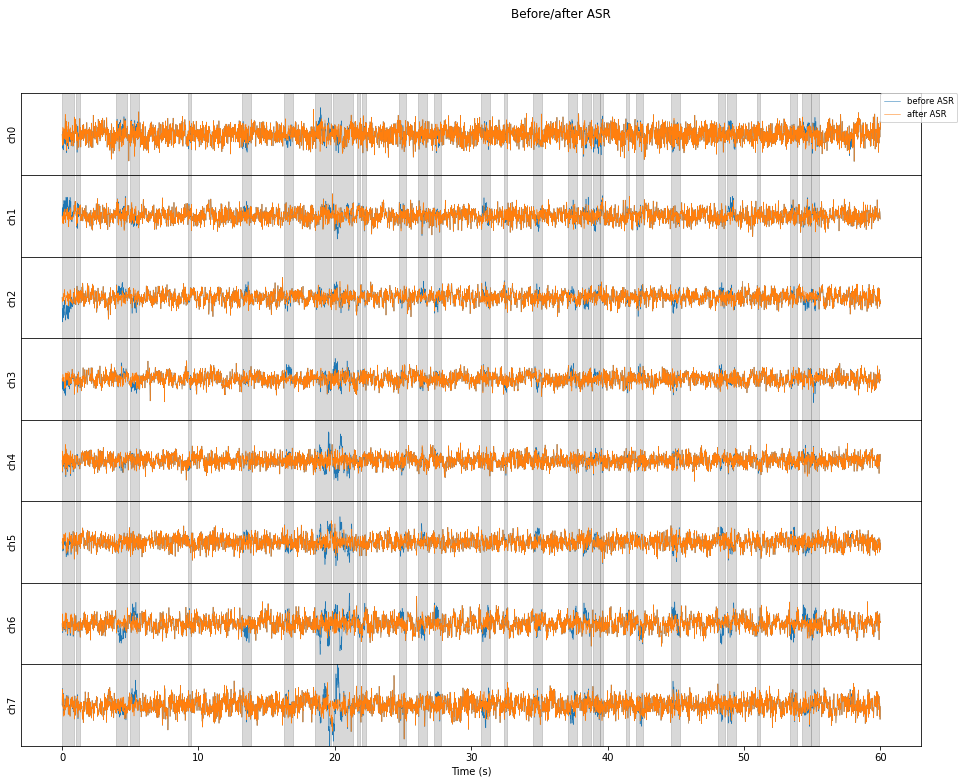

In [ ]:
times = np.arange(raw.shape[-1]) / sfreq
f, ax = plt.subplots(8, sharex=True, figsize=(20, 12))
for i in range(8):
  ax[i].plot(times, raw[i], lw=.5, label='before ASR')
  ax[i].plot(times, clean[i], label='after ASR', lw=.5)
  ax[i].set_ylim([-50, 50])
  ax[i].set_ylabel(f'ch{i}')
  ax[i].set_yticks([])
  # print(range(len(mask_ids)-1))
  j=0
  for array in list_segments:
    # print(tmp_ids)
    ax[i].fill_between(array / sfreq, 0, 1, color='grey', alpha=.3,
                      transform=ax[i].get_xaxis_transform())
    j += 2
ax[i].set_xlabel('Time (s)')
ax[0].legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

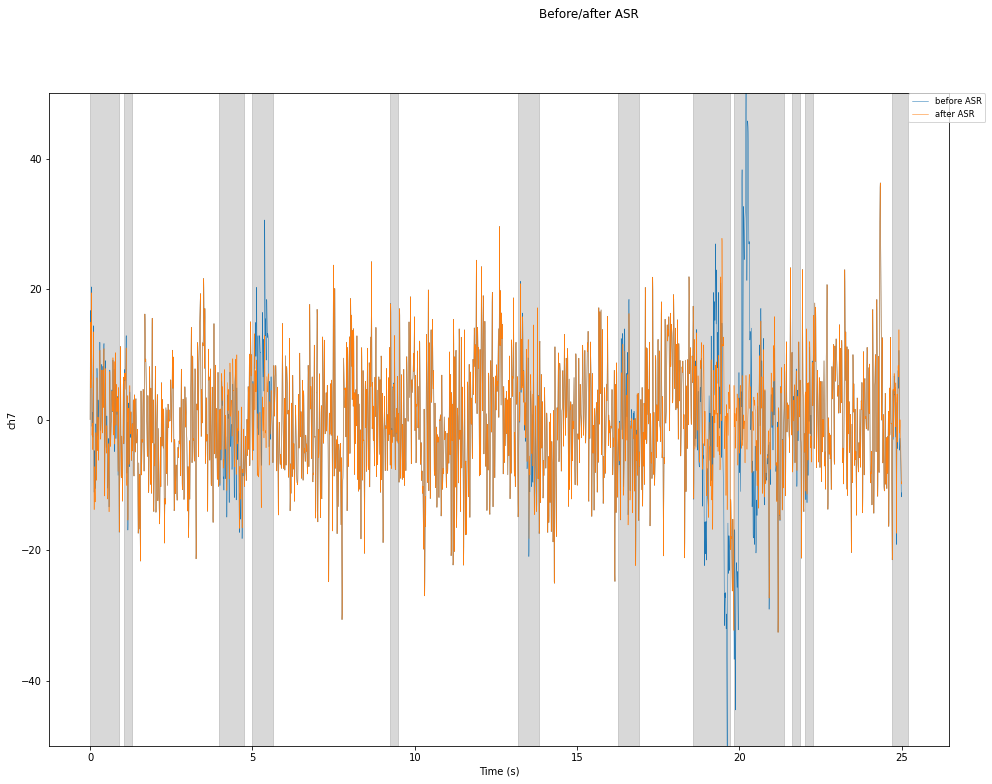

In [ ]:
times = np.arange(6250) / sfreq #raw.shape[-1]
f, ax = plt.subplots(figsize=(20, 12))
ax.plot(times, raw[7,0:6250], lw=.5, label='before ASR')
ax.plot(times, clean[7,0:6250], label='after ASR', lw=.5)
ax.set_ylim([-50, 50])
ax.set_ylabel(f'ch{i}')
# print(range(len(mask_ids)-1))
j=0
for array in list_segments:
  if (array[0]/sfreq <= times[-1]):
    # print(tmp_ids)
    ax.fill_between(array / sfreq, 0, 1, color='grey', alpha=.3,
                      transform=ax.get_xaxis_transform())
  j += 2
ax.set_xlabel('Time (s)')
ax.legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

## Tested on our data

In [ ]:
edf_in = pyedflib.EdfReader('epoch2.edf')

In [ ]:
labels = edf_in.getSignalLabels()
nch = len(labels)

In [ ]:
N=edf_in.getNSamples()[0]

In [ ]:
chns = np.arange(nch)
signal = np.array([], dtype=np.int64).reshape(0,N)
for chan in chns:
  chn_sig = edf_in.readSignal(chan)
  signal = np.vstack([signal, chn_sig])
signal.shape

(15, 614528)

In [ ]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
t = np.arange(0,N)/srate

In [ ]:
# Train on a clean portion of data
asr = ASR(sfreq=srate, method='euclid', blocksize=10)
train_idx = np.arange(0 * srate, 30 * srate, dtype=int)
_, sample_mask = asr.fit(signal[:, train_idx])

In [ ]:
clean, mask = asr.transform(signal)

(15, 205013)
(15, 205013)
(15, 205014)
9225600


In [ ]:
mask.shape

(15, 614528)

In [ ]:
clean.shape

(15, 614528)

In [ ]:
np.logical_not(mask[0,0:10])

array([False, False, False, False, False, False, False,  True,  True,
        True])

In [ ]:
mask[:,0:10]

array([[ True,  True,  True,  True,  True,  True,  True, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
        False],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True, 

In [ ]:
mask_final = np.logical_not(mask[0,:])
for i in np.arange(2,mask.shape[0]):
  tmp = np.logical_not(mask[i,:])
  mask_final = np.logical_or(mask_final,tmp)
mask_final[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
mask_ids = np.where(mask_final==True)[0]

In [ ]:
mask_ids

array([     0,      1,      2, ..., 491359, 491360, 491361])

In [ ]:
list_segments = separate_array(mask_ids)

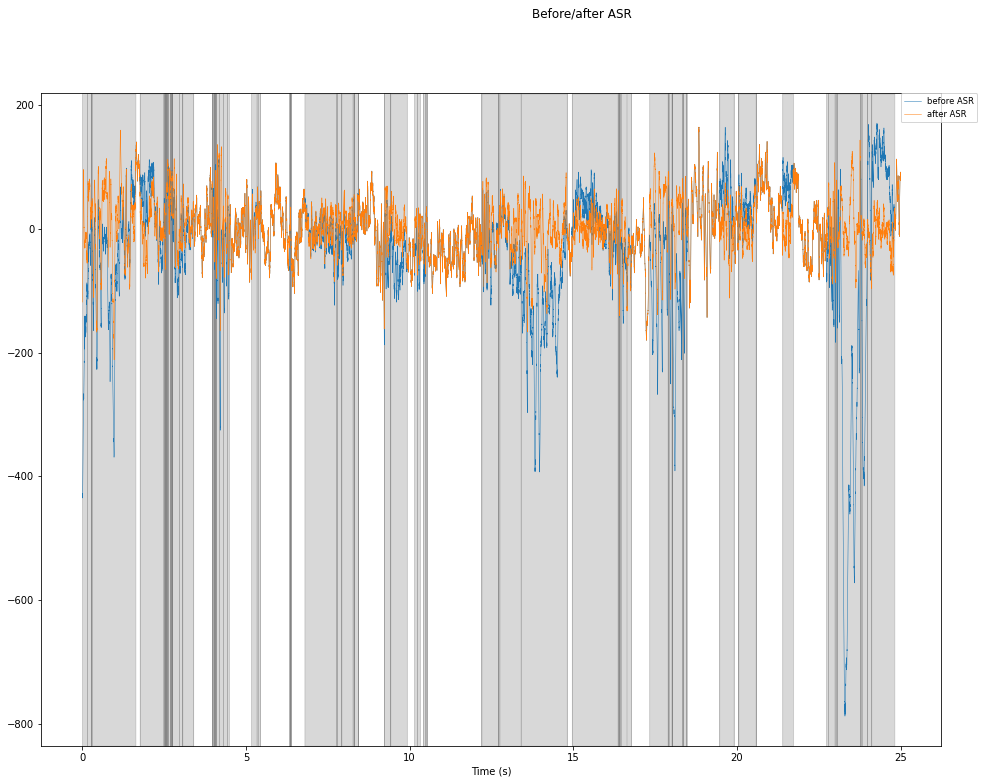

In [ ]:
end_time_id = int(25*srate)
times = np.arange(end_time_id) / srate #raw.shape[-1]
f, ax = plt.subplots(figsize=(20, 12))
ax.plot(times, signal[10,0:end_time_id], lw=.5, label='before ASR')
ax.plot(times, clean[10,0:end_time_id], label='after ASR', lw=.5)
# ax.set_ylim([-50, 50])
# ax.set_ylabel(f'ch{i}')
# print(range(len(mask_ids)-1))
j=0
for array in list_segments:
  if (array[0]/srate <= times[-1]):
    # print(tmp_ids)
    ax.fill_between(array / srate, 0, 1, color='grey', alpha=.3,
                      transform=ax.get_xaxis_transform())
  j += 2
ax.set_xlabel('Time (s)')
ax.legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

# Autoreject


In [7]:
# !pip install autoreject
!pip install h5io
import autoreject.autoreject


Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic


In [8]:
# !pip install mne
import mne

In [8]:
import numpy as np
# !pip install pyedflib
import pyedflib

In [10]:
def get_montage(ch_pos, subject, subjects_dir):
    """Get montage given Surface RAS (aka mri coordinates in MNE)
    Parameters
    ----------
    ch_pos : dict
        Dictionary of channel positions. Keys are channel names and values
        are 3D coordinates - array of shape (3,) - in native digitizer space
        in m.
    subject ： str
        the name of subject in FreeSurfer
    subjects_dir : str
        the directory of your FreeSurfer subject directory

    Returns : head montage
    -------
        
    """
    subj_trans = mne.coreg.estimate_head_mri_t(subject, subjects_dir)
    mri_to_head_trans = mne.transforms.invert_transform(subj_trans)
    print('Start transforming mri to head')
    print(mri_to_head_trans)

    montage_mri = mne.channels.make_dig_montage(ch_pos, coord_frame='mri')
    montage = montage_mri.copy()
    montage.add_estimated_fiducials(subject, subjects_dir)
    montage.apply_trans(mri_to_head_trans)
    return montage_mri, montage

In [9]:
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

In [12]:
labels = edf_in.getSignalLabels()
nch = len(labels)

In [13]:
labels[0:10]

['Patient Event',
 'LMiLs1',
 'LMiLs2',
 'LMiLs3',
 'LMiLs4',
 'LMiLs5',
 'LMiLs6',
 'LMiLs7',
 'LMiLs8',
 'LMiLs9']

In [5]:
# Load positions
import pandas as pd
elec_pos = pd.read_csv('/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv', sep='\t')
elec_pos.head()

,type,label,x,y,z,orig_group,new_label,new_group
0,SEEGA,LMiLs1,-4.131,91.778,18.803,LMiLs,LMiLs1,LMiLs
1,SEEGA,LMiLs2,-3.711,93.186,23.584,LMiLs,LMiLs2,LMiLs
2,SEEGA,LMiLs3,-3.134,94.822,28.278,LMiLs,LMiLs3,LMiLs
3,SEEGA,LMiLs4,-2.608,96.424,32.984,LMiLs,LMiLs4,LMiLs
4,SEEGA,LMiLs5,-2.012,98.037,37.683,LMiLs,LMiLs5,LMiLs


In [15]:
def get_chn_positions(chn_df):
    chn_pos = {}
    for i in np.arange(len(chn_df)):
        label = elec_pos.loc[[i], ['label']].values[0][0]
        pos = elec_pos.loc[[i], ['x','y','z']].values[0]/1000
        pos = pos.tolist()
        chn_pos[label] = pos
    return chn_pos

In [16]:
chn_pos = get_chn_positions(elec_pos)

In [17]:
labels.index(list(chn_pos.keys())[0])

1

In [10]:
N=edf_in.getNSamples()[0]
N

614528

In [13]:
import pandas as pd

annot2 = edf_in.readAnnotations()
annot2 = {
    'Onset': annot2[0],
    'Duration': annot2[1],
    'event': annot2[2]
}
annot2 = pd.DataFrame(annot2)
annot2.head()

,Onset,Duration,event
0,-0.00007,-1.0,Recording starts
1,-0.00007,-1.0,Epoch #1 starts.
2,240.00043,-1.0,Epoch #1 ends.


In [15]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
t = np.arange(0, N)/srate
t_test = np.argmin((np.abs(t-annot2.Onset.to_numpy()[2])))
srate # Time to final of epoch

2048.0

In [14]:
signal = np.array([], dtype=np.int64).reshape(0,t_test)
keys = list(chn_pos.keys())
for chan in keys:
    id_ch = labels.index(chan)
    chn_sig = edf_in.readSignal(id_ch)
    signal = np.vstack([signal, chn_sig[0:t_test]])
signal.shape

NameError: name 't_test' is not defined

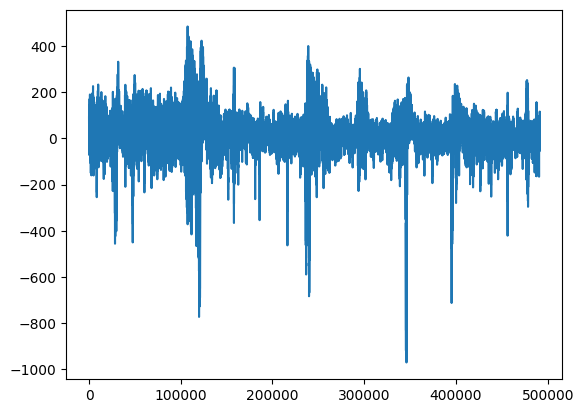

In [18]:
import matplotlib.pyplot as plt 
plt.plot(signal[0,:])

In [22]:
n_epoch = int(5*srate) # 5 seconds
signal.shape[1]/n_epoch

48.00009765625

In [23]:
signal_epoch = np.zeros((int(signal.shape[1]/n_epoch), signal.shape[0], n_epoch))
id = 0
for epoch_id in np.arange(int(signal.shape[1]/n_epoch)):
  tmp = signal[:,id:id+n_epoch]
  signal_epoch[epoch_id,:,:] = tmp
  id += n_epoch
signal_epoch.shape

(48, 80, 10240)

In [24]:
info = mne.create_info(ch_names=keys,
                       ch_types=['seeg'] * len(keys),
                       sfreq=srate)

In [25]:
mne_epochs = mne.EpochsArray(signal_epoch, info)

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated


In [19]:
edf_in.close()

In [23]:
_, montage = get_montage(chn_pos, 'sub-P079', '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/')

Start transforming mri to head
<Transform | MRI (surface RAS)->head>
[[ 0.99522067  0.03380816 -0.09161239 -0.00202999]
 [-0.03087106  0.99896884  0.03329013  0.02576594]
 [ 0.0926434  -0.03030285  0.99523813  0.04037436]
 [ 0.          0.          0.          1.        ]]


In [24]:
mne_epochs.set_montage(montage)

Number of events,48
Events,1: 48
Time range,0.000 – 5.000 sec
Baseline,off


In [25]:
from autoreject.autoreject import AutoReject, compute_thresholds
exclude = []  # XXX
picks = mne.pick_types(mne_epochs.info, meg='grad', exclude=exclude)
ar = AutoReject(random_state=42, n_jobs=-1, verbose=True)

In [26]:
epochs_ar, reject_log = ar.fit_transform(mne_epochs, return_log=True)

Running autoreject on ch_type=seeg


/local/mcesped.3907028.0/tmp/kslurm-venv-eygxspm9/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Creating augmented epochs : 80/80 [00:00<00:00,  108.11it/s]
100%|██████████| Computing thresholds ... : 80/80 [02:27<00:00,    1.84s/it]


  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  2%|▏         | Repairing epochs : 1/48 [00:00<00:00,   59.27it/s]

  6%|▋         | Repairing epochs : 3/48 [00:00<00:00,   80.27it/s]

 10%|█         | Repairing epochs : 5/48 [00:00<00:00,   86.67it/s]

 15%|█▍        | Repairing epochs : 7/48 [00:00<00:00,   90.48it/s]

 19%|█▉        | Repairing epochs : 9/48 [00:00<00:00,   93.21it/s]

 23%|██▎       | Repairing epochs : 11/48 [00:00<00:00,   95.09it/s]

 27%|██▋       | Repairing epochs : 13/48 [00:00<00:00,   96.46it/s]

 31%|███▏ 





Estimated consensus=0.60 and n_interpolate=32




  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,  105.54it/s]

  8%|▊         | Repairing epochs : 4/48 [00:00<00:00,   95.86it/s]

 12%|█▎        | Repairing epochs : 6/48 [00:00<00:00,   92.48it/s]

 17%|█▋        | Repairing epochs : 8/48 [00:00<00:00,   92.32it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:00,   92.00it/s]

 25%|██▌       | Repairing epochs : 12/48 [00:00<00:00,   90.26it/s]

 29%|██▉       | Repairing epochs : 14/48 [00:00<00:00,   90.60it/s]

 33%|███▎      | Repairing epochs : 16/48 [00:00<00:00,   90.51it/s]

 38%|███▊      | Repairing epochs : 18/48 [00:00<00:00,   91.30it/s]

 42%|████▏     | Repairing epochs : 20/48 [00:00<00:00,   91.92it/s]

 46%|████▌     | Repairing epochs : 22/48 [00:00<00:00,   92.38it/s]

 50%|█████     | Repairing epochs : 24/48 [00:00<00:00,   89.73it/s]

 54%|█████▍    | Repairing epochs : 26/48 [00:00<00:00,   88.45it/s]

 58%|█████▊    | Repairing 

Dropped 4 epochs: 10, 11, 23, 33


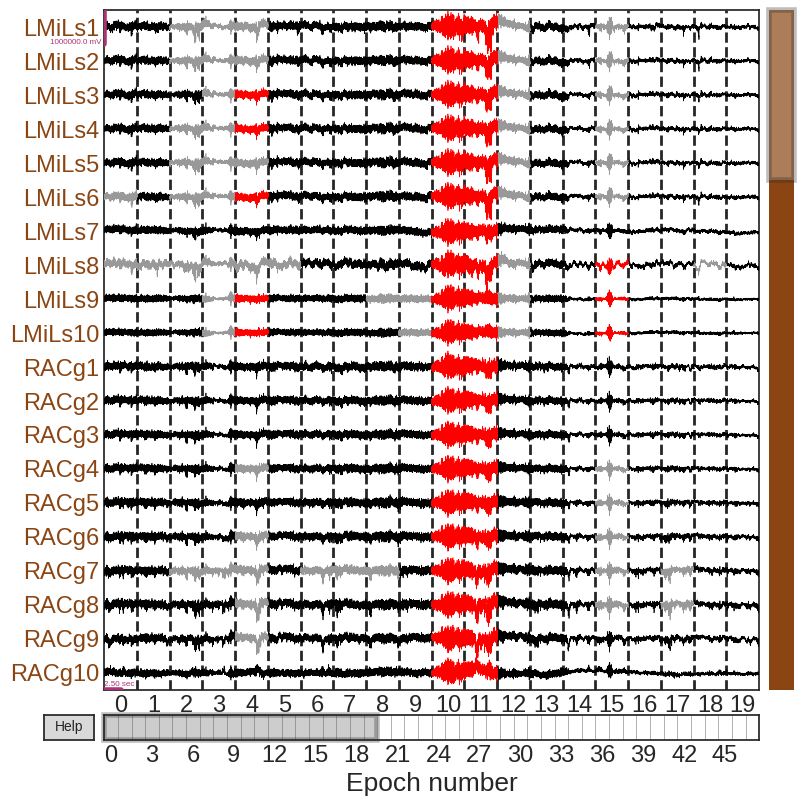

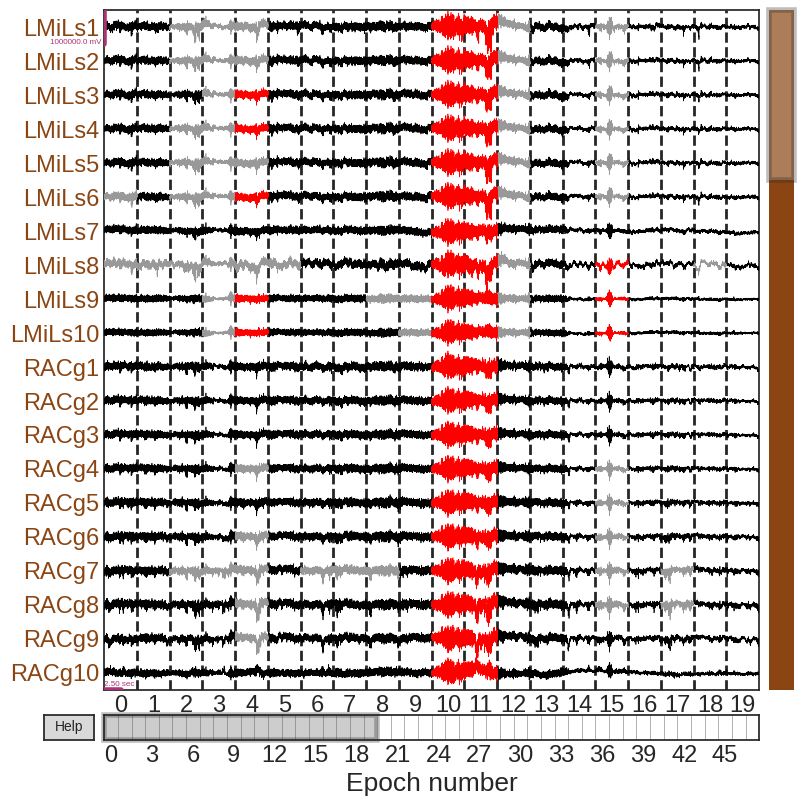

In [36]:
scalings = dict(seeg=500)
reject_log.plot_epochs(mne_epochs, scalings=scalings)

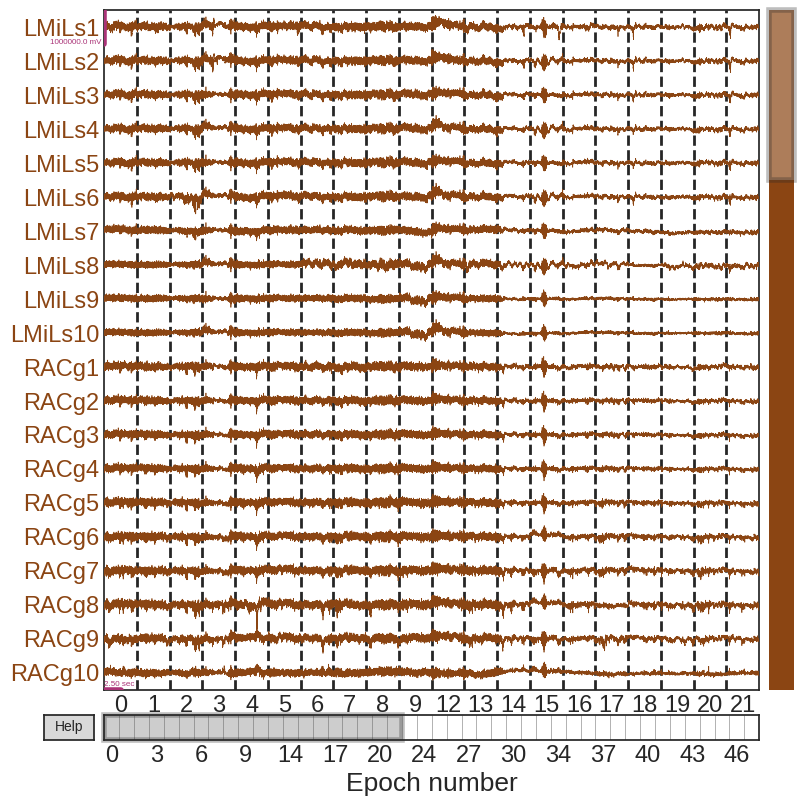

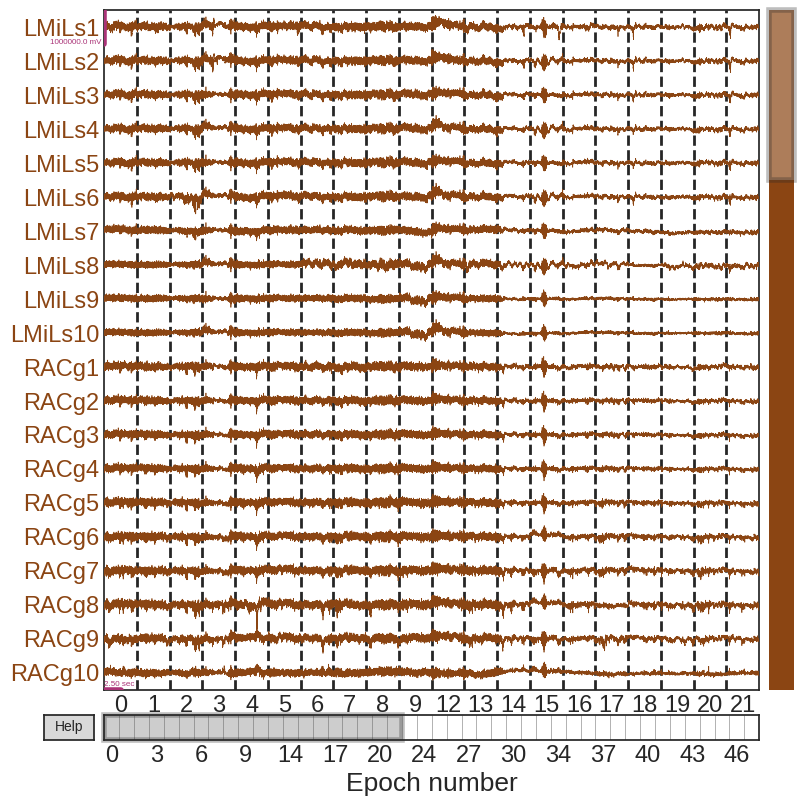

In [37]:
epochs_ar.plot(scalings=scalings)


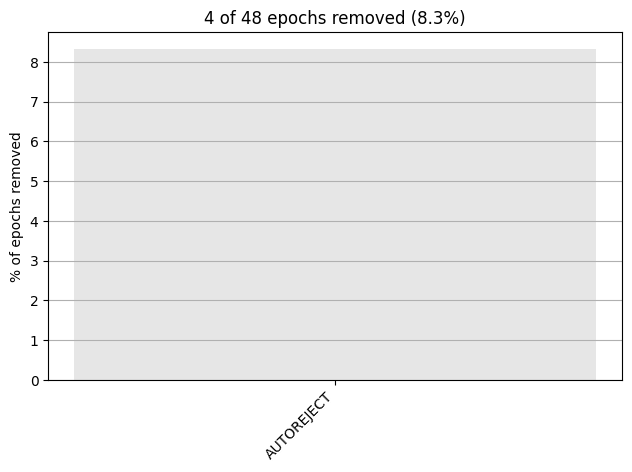

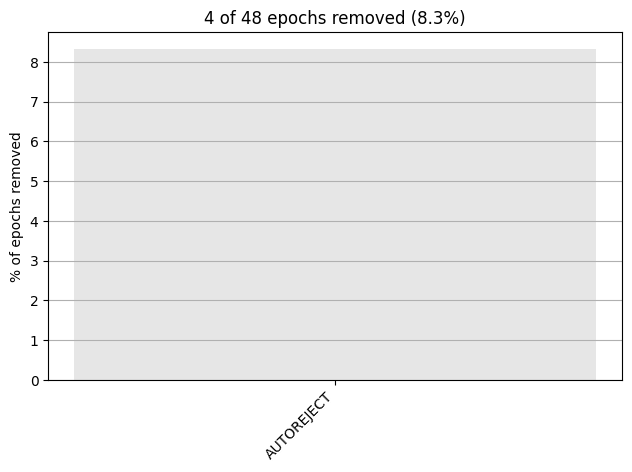

In [28]:
epochs_ar.plot_drop_log()

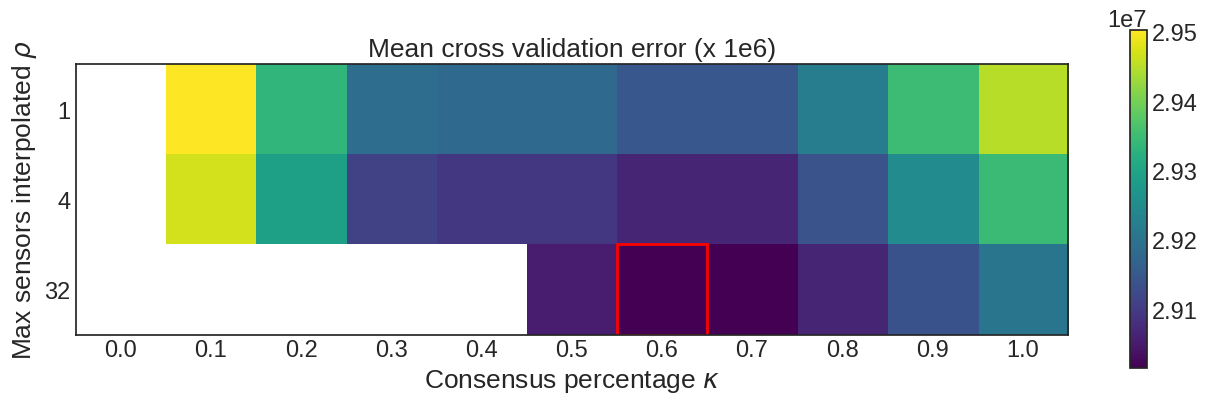

In [30]:
import numpy as np  # noqa
import matplotlib.pyplot as plt  # noqa
import matplotlib.patches as patches  # noqa
from autoreject import set_matplotlib_defaults  # noqa

set_matplotlib_defaults(plt, style='seaborn-white')
loss = ar.loss_['seeg'].mean(axis=-1)  # losses are stored by channel type.

plt.matshow(loss.T * 1e6, cmap=plt.get_cmap('viridis'))
plt.xticks(range(len(ar.consensus)), ['%.1f' % c for c in ar.consensus])
plt.yticks(range(len(ar.n_interpolate)), ar.n_interpolate)

# Draw rectangle at location of best parameters
ax = plt.gca()
idx, jdx = np.unravel_index(loss.argmin(), loss.shape)
rect = patches.Rectangle((idx - 0.5, jdx - 0.5), 1, 1, linewidth=2,
                         edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.xaxis.set_ticks_position('bottom')
plt.xlabel(r'Consensus percentage $\kappa$')
plt.ylabel(r'Max sensors interpolated $\rho$')
plt.title('Mean cross validation error (x 1e6)')
plt.colorbar()
plt.show()

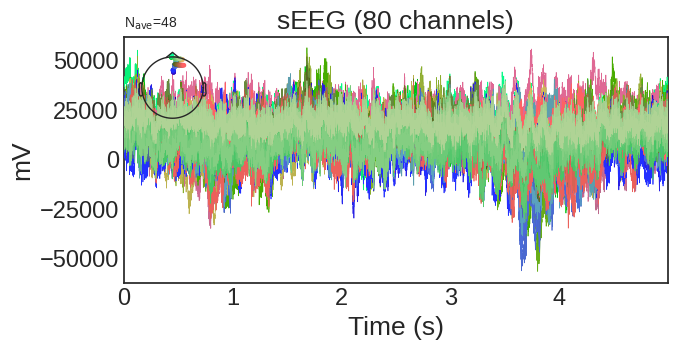

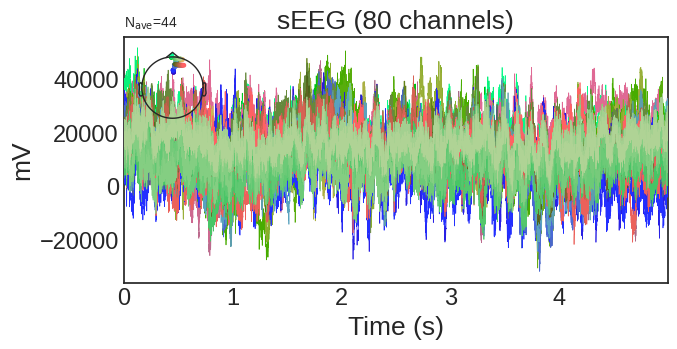

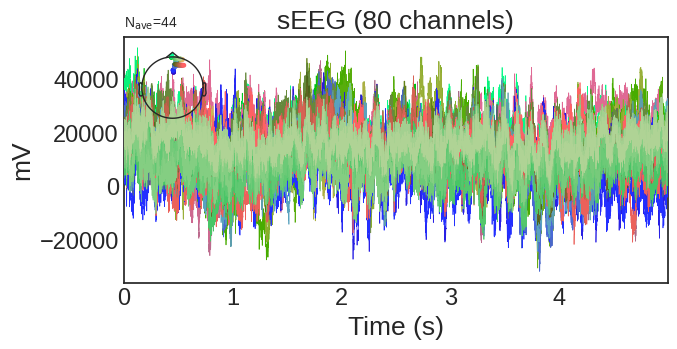

In [31]:
mne_epochs.average().plot(spatial_colors=True)
epochs_ar.average().plot(spatial_colors=True)

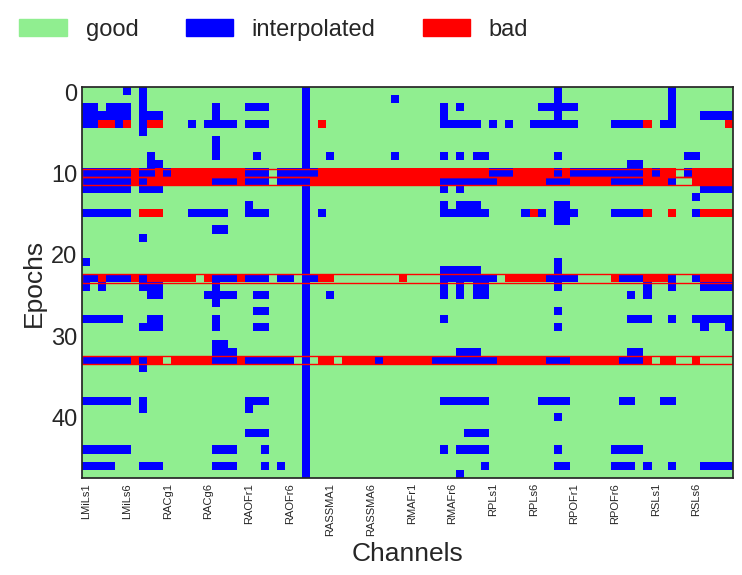

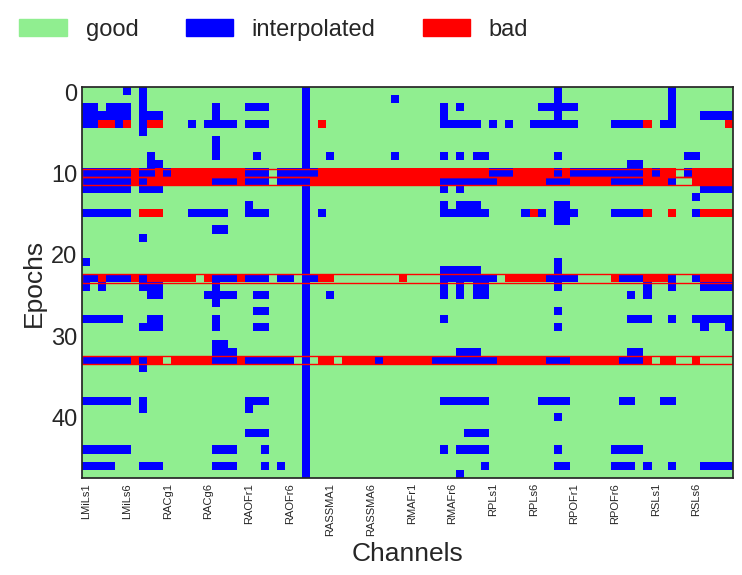

In [32]:
ar.get_reject_log(mne_epochs).plot()

In [38]:
cleaned = epochs_ar.get_data()
cleaned.shape

(44, 80, 10240)

In [39]:
orig = mne_epochs.get_data()
orig.shape

(48, 80, 10240)

# Test my code

In [1]:
from clean_seeg import clean_epochs, cleanSEEG

In [2]:
!pip install h5io

Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
Processing /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic/h5io-0.1.7+computecanada-py3-none-any.whl


In [3]:
edf_path = '/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf'
chn_csv_path = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/seega_coordinates/sub-P079/sub-P079_space-native_SEEGA.tsv'
subject ='sub-P079'
subjects_dir = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/fastsurfer/'
trsfPath = '/home/mcesped/projects/ctb-akhanf/cfmm-bids/Khan/clinical_imaging/epi_iEEG/derivatives/atlasreg/sub-P079/sub-P079_acq-noncontrast_desc-rigid_from-noncontrast_to-contrast_type-ras_xfm.txt'

## Using Zapline

In [4]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Zapline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5)

In [5]:
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True)

491521
Removing line noise
caca
2
3
(80, 491521)
Removing drifts
(80, 491521)
Running autoreject
Start transforming mri to head
<Transform | MRI (surface RAS)->head>
[[ 0.99522067  0.03380816 -0.09161239 -0.00202999]
 [-0.03087106  0.99896884  0.03329013  0.02576594]
 [ 0.0926434  -0.03030285  0.99523813  0.04037436]
 [ 0.          0.          0.          1.        ]]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Running autoreject on ch_type=seeg


/local/mcesped.4083812.0/tmp/kslurm-venv-v3hjon2p/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Creating augmented epochs : 80/80 [00:00<00:00,  101.25it/s]
100%|██████████| Computing thresholds ... : 80/80 [02:06<00:00,    1.58s/it]


  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,  116.46it/s]

  8%|▊         | Repairing epochs : 4/48 [00:00<00:00,  112.76it/s]

 12%|█▎        | Repairing epochs : 6/48 [00:00<00:00,  104.02it/s]

 17%|█▋        | Repairing epochs : 8/48 [00:00<00:00,  100.35it/s]

 19%|█▉        | Repairing epochs : 9/48 [00:00<00:00,   90.75it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:00,   85.58it/s]

 25%|██▌       | Repairing epochs : 12/48 [00:00<00:00,   85.80it/s]

 29%|██▉  





Estimated consensus=0.50 and n_interpolate=32




  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  2%|▏         | Repairing epochs : 1/48 [00:00<00:00,   55.33it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,   54.57it/s]

  6%|▋         | Repairing epochs : 3/48 [00:00<00:00,   54.94it/s]

 10%|█         | Repairing epochs : 5/48 [00:00<00:00,   60.80it/s]

 15%|█▍        | Repairing epochs : 7/48 [00:00<00:00,   65.97it/s]

 19%|█▉        | Repairing epochs : 9/48 [00:00<00:00,   69.50it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:01,   36.40it/s]

 25%|██▌       | Repairing epochs : 12/48 [00:00<00:00,   40.65it/s]

 29%|██▉       | Repairing epochs : 14/48 [00:00<00:00,   44.41it/s]

 33%|███▎      | Repairing epochs : 16/48 [00:00<00:00,   47.69it/s]

 38%|███▊      | Repairing epochs : 18/48 [00:00<00:00,   50.74it/s]

 42%|████▏     | Repairing epochs : 20/48 [00:00<00:00,   53.45it/s]

 46%|████▌     | Repairing epochs : 22/48 [00:00<00:00,   55.88it/s]

 50%|█████     | Repairing ep

Dropped 3 epochs: 4, 11, 33
(45, 80, 10240)
(80, 614528)
(80, 614528)


In [8]:
# clean, df_epochs = clean_epochs(edf_path, chn_csv_path, subject, subjects_dir, trsfPath=trsfPath, time_epoch=5)

In [6]:
df_epochs

,Epoch #,Start ID,End ID,LMiLs1,LMiLs2,LMiLs3,LMiLs4,LMiLs5,LMiLs6,LMiLs7,...,RSLs1,RSLs2,RSLs3,RSLs4,RSLs5,RSLs6,RSLs7,RSLs8,RSLs9,RSLs10
0,1,0,10240,N,C,C,C,C,C,C,...,C,N,C,C,N,N,C,C,C,C
1,2,10240,20480,C,C,C,C,C,C,C,...,C,C,C,C,C,N,C,C,C,C
2,3,20480,30720,N,N,N,N,N,N,N,...,C,N,C,C,C,N,C,C,C,C
3,4,30720,40960,C,C,C,C,C,C,C,...,C,C,C,C,C,N,C,C,C,C
4,5,40960,51200,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
5,6,51200,61440,N,C,C,C,C,C,C,...,C,C,C,C,C,N,C,C,C,C
6,7,61440,71680,C,C,C,C,C,C,C,...,C,C,C,C,C,N,C,C,C,C
7,8,71680,81920,C,C,C,C,C,C,C,...,C,C,C,C,C,N,C,C,C,C
8,9,81920,92160,C,C,C,C,C,C,C,...,C,C,C,C,N,N,C,C,C,C
9,10,92160,102400,C,C,C,C,C,C,C,...,C,C,C,C,C,N,C,C,C,C


In [7]:
clean.shape #491521

(80, 614528)

In [8]:
interpolated.shape

(80, 583808)

In [9]:
srate = 2048.0
614528 - int(srate*5)*3

583808

In [18]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')


In [19]:
edf_in.getSignalLabels()[0:3]

['Patient Event', 'LMiLs1', 'LMiLs2']

### Time domain plots

(400.0, -400.0)

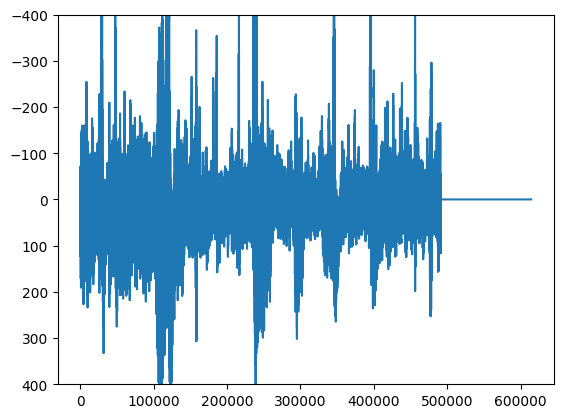

In [20]:
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

(400.0, -400.0)

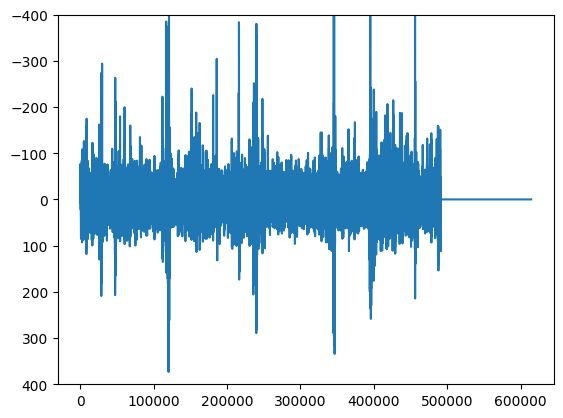

In [10]:
import matplotlib.pyplot as plt
plt.plot(clean[0,:])
plt.ylim([400,-400])

(400.0, -400.0)

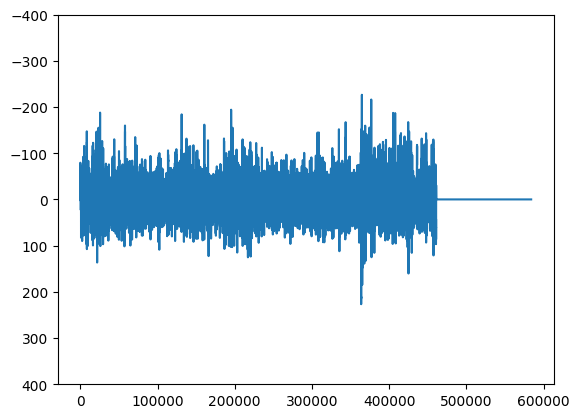

In [11]:
import matplotlib.pyplot as plt
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

### Frequency domain plots

In [14]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [21]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

(0.0, 100.0)

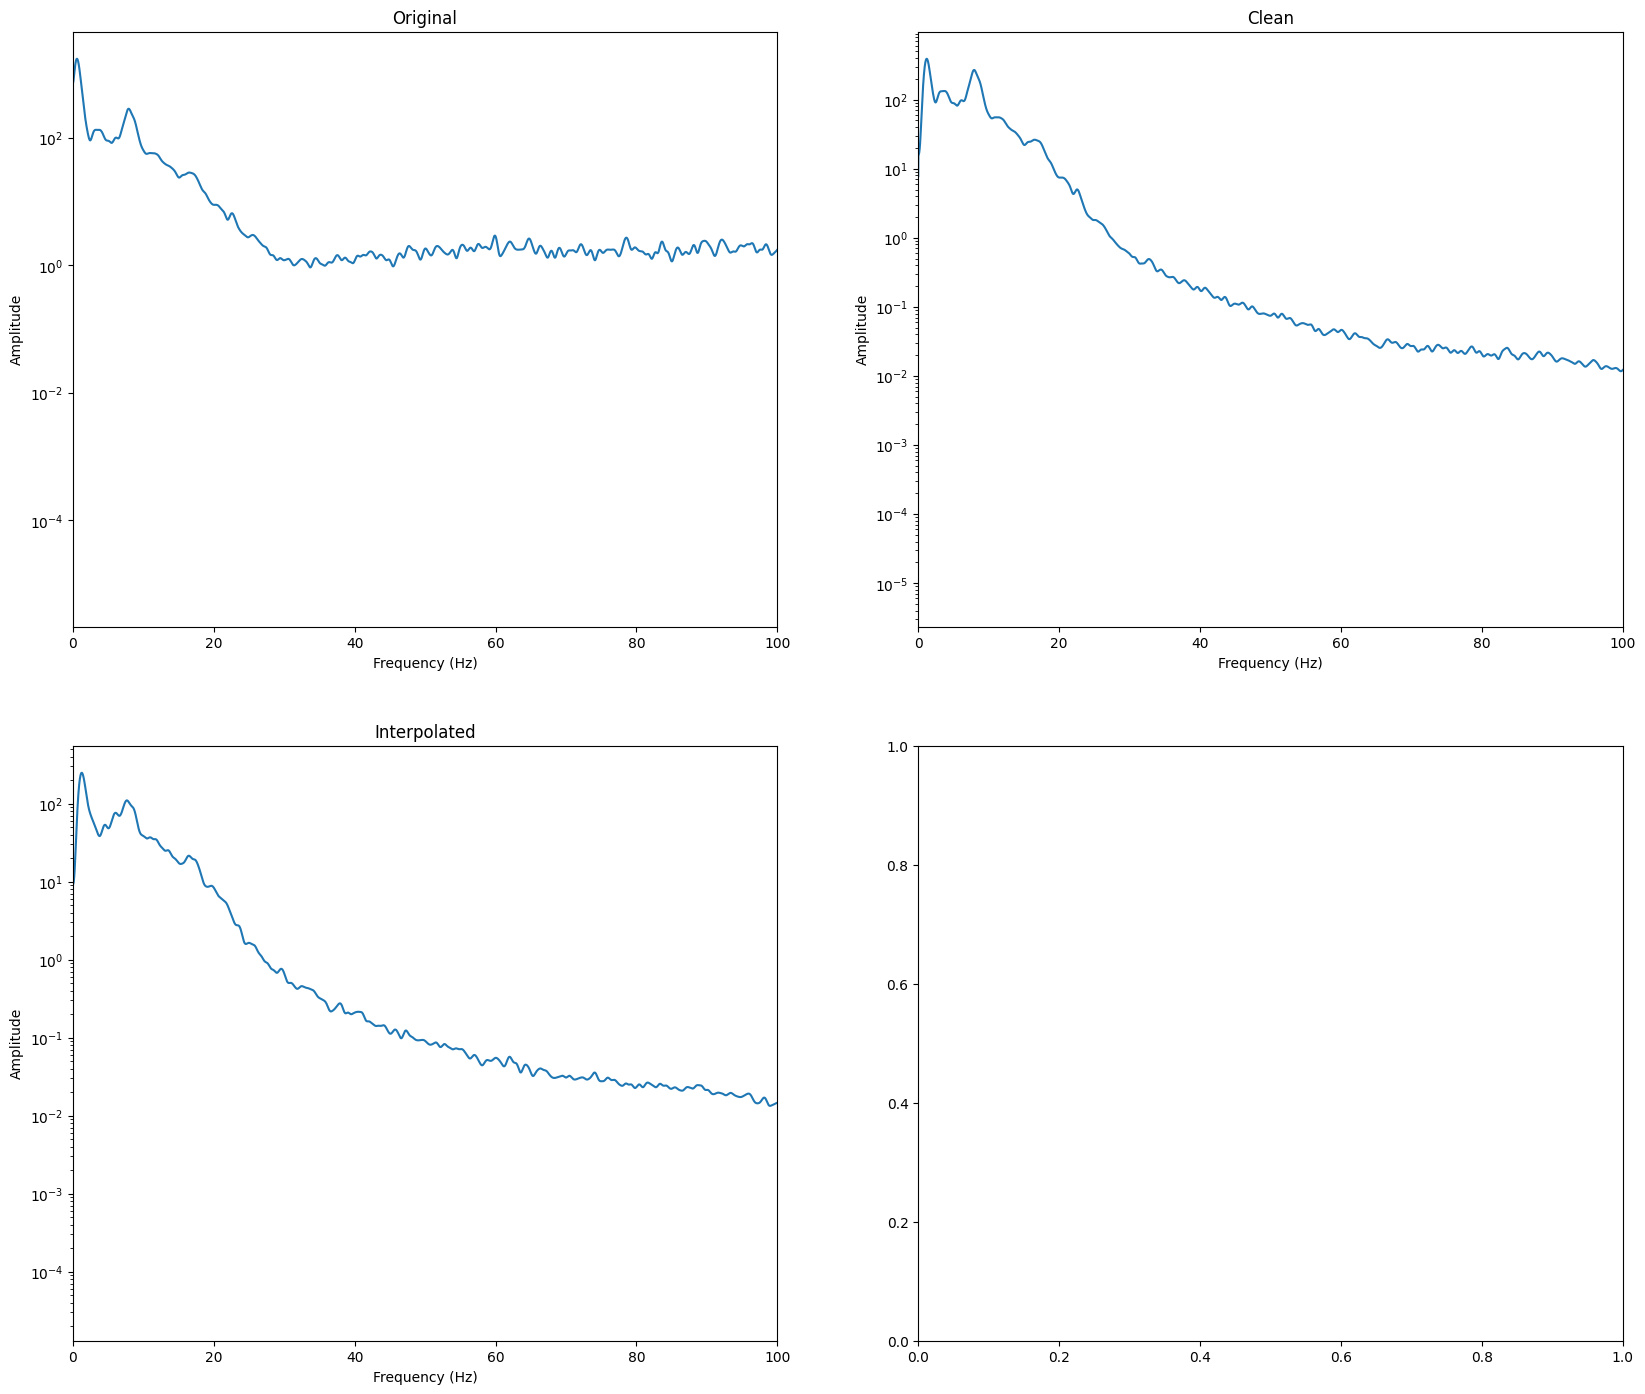

In [23]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_xlim([0,100])

In [22]:
edf_in.close()

## Using Cleanline

In [4]:
# Testing class
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'Cleanline', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 8)

In [5]:
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True)

491521
Removing line noise
[60, 120, 180]
18
19
20
45
46
47
63
64
65
0
1
2
27
28
29
57
58
59
12
13
14
30
31
32
51
52
53
15
16
17
42
43
44
66
67
68
21
22
23
36
37
38
60
61
62
78
79
9
10
11
39
40
41
69
70
71
6
7
8
33
34
35
54
55
56
75
76
77


/scratch/mcesped/code/sEEGPrep/clean_seeg/utils.py:621: ComplexWarning: Casting complex values to real discards the imaginary part
  datafit[indx, :] = datafitwin
/scratch/mcesped/code/sEEGPrep/clean_seeg/utils.py:618: ComplexWarning: Casting complex values to real discards the imaginary part
  datafitwin[0:Noverlap,:] = np.multiply(smooth,datafitwin[0:Noverlap,:]) \
/scratch/mcesped/code/sEEGPrep/clean_seeg/utils.py:621: ComplexWarning: Casting complex values to real discards the imaginary part
  datafit[indx, :] = datafitwin
/scratch/mcesped/code/sEEGPrep/clean_seeg/utils.py:618: ComplexWarning: Casting complex values to real discards the imaginary part
  datafitwin[0:Noverlap,:] = np.multiply(smooth,datafitwin[0:Noverlap,:]) \
/scratch/mcesped/code/sEEGPrep/clean_seeg/utils.py:621: ComplexWarning: Casting complex values to real discards the imaginary part
  datafit[indx, :] = datafitwin
/scratch/mcesped/code/sEEGPrep/clean_seeg/utils.py:618: ComplexWarning: Casting complex values to

PLI removal completed.
(80, 491521)
Removing drifts
(80, 491521)
Running autoreject
Start transforming mri to head
<Transform | MRI (surface RAS)->head>
[[ 0.99522067  0.03380816 -0.09161239 -0.00202999]
 [-0.03087106  0.99896884  0.03329013  0.02576594]
 [ 0.0926434  -0.03030285  0.99523813  0.04037436]
 [ 0.          0.          0.          1.        ]]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Running autoreject on ch_type=seeg


/local/mcesped.4172714.0/tmp/kslurm-venv-2497zgtg/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Creating augmented epochs : 80/80 [00:00<00:00,  118.10it/s]
100%|██████████| Computing thresholds ... : 80/80 [01:04<00:00,    1.25it/s]


  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,  113.23it/s]

  8%|▊         | Repairing epochs : 4/48 [00:00<00:00,  110.38it/s]

 12%|█▎        | Repairing epochs : 6/48 [00:00<00:00,  109.13it/s]

 17%|█▋        | Repairing epochs : 8/48 [00:00<00:00,  108.57it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:00,  108.21it/s]

 25%|██▌       | Repairing epochs : 12/48 [00:00<00:00,  108.73it/s]

 29%|██▉       | Repairing epochs : 14/48 [00:00<00:00,  109.24it/s]

 33%|███▎





Estimated consensus=0.60 and n_interpolate=4




  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,  106.05it/s]

  8%|▊         | Repairing epochs : 4/48 [00:00<00:00,  101.52it/s]

 12%|█▎        | Repairing epochs : 6/48 [00:00<00:00,  101.54it/s]

 15%|█▍        | Repairing epochs : 7/48 [00:00<00:01,   32.87it/s]

 17%|█▋        | Repairing epochs : 8/48 [00:00<00:01,   35.10it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:00,   39.91it/s]

 25%|██▌       | Repairing epochs : 12/48 [00:00<00:00,   44.43it/s]

 29%|██▉       | Repairing epochs : 14/48 [00:00<00:00,   48.87it/s]

 33%|███▎      | Repairing epochs : 16/48 [00:00<00:00,   53.19it/s]

 38%|███▊      | Repairing epochs : 18/48 [00:00<00:00,   57.12it/s]

 42%|████▏     | Repairing epochs : 20/48 [00:00<00:00,   60.73it/s]

 46%|████▌     | Repairing epochs : 22/48 [00:00<00:00,   64.04it/s]

 50%|█████     | Repairing epochs : 24/48 [00:00<00:00,   67.04it/s]

 54%|█████▍    | Repairing e

Dropped 4 epochs: 10, 11, 23, 33
(44, 80, 10240)
(80, 614528)
(80, 614528)


In [6]:
df_epochs

,Epoch #,Start ID,End ID,LMiLs1,LMiLs2,LMiLs3,LMiLs4,LMiLs5,LMiLs6,LMiLs7,...,RSLs1,RSLs2,RSLs3,RSLs4,RSLs5,RSLs6,RSLs7,RSLs8,RSLs9,RSLs10
0,1,0,10240,C,C,C,C,C,C,C,...,C,C,C,C,C,N,N,C,C,N
1,2,10240,20480,C,C,C,C,C,C,C,...,C,C,C,C,C,N,C,C,C,C
2,3,20480,30720,N,C,C,C,C,C,C,...,C,C,C,C,C,N,N,C,C,N
3,4,30720,40960,C,C,C,C,C,C,C,...,C,C,C,C,C,N,N,C,C,N
4,5,40960,51200,N,C,C,C,C,C,C,...,N,C,N,C,C,N,N,C,C,N
5,6,51200,61440,C,C,C,C,C,C,C,...,C,C,C,C,C,C,N,C,C,C
6,7,61440,71680,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
7,8,71680,81920,C,C,C,C,C,C,C,...,C,C,C,C,C,N,N,C,C,N
8,9,81920,92160,C,C,C,C,C,C,C,...,C,C,C,C,N,N,N,C,C,N
9,10,92160,102400,C,C,C,C,C,C,C,...,C,C,C,C,C,C,N,C,C,N


In [7]:
interpolated.shape

(80, 573568)

In [8]:
srate = 2048.0
614528 - int(srate*5)*4

573568

In [9]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')

(400.0, -400.0)

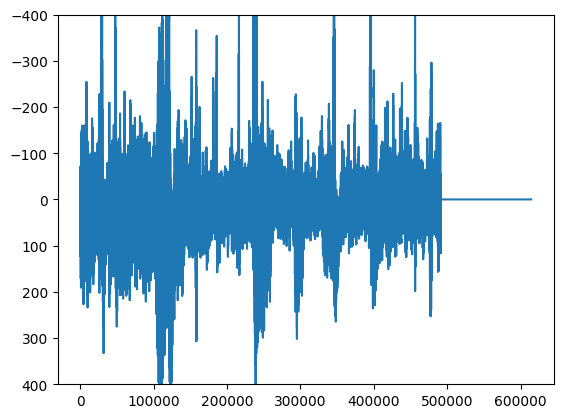

In [10]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

(400.0, -400.0)

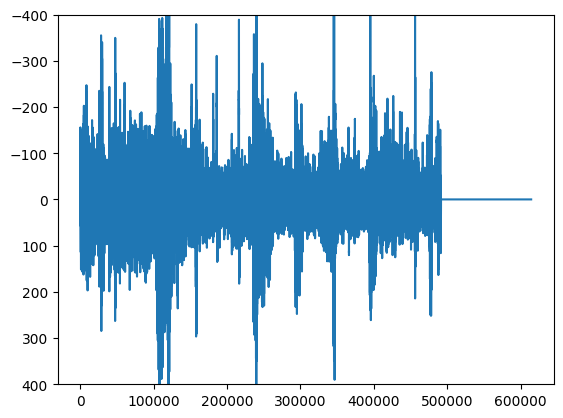

In [11]:
import matplotlib.pyplot as plt
plt.plot(clean[0,:])
plt.ylim([400,-400])

(400.0, -400.0)

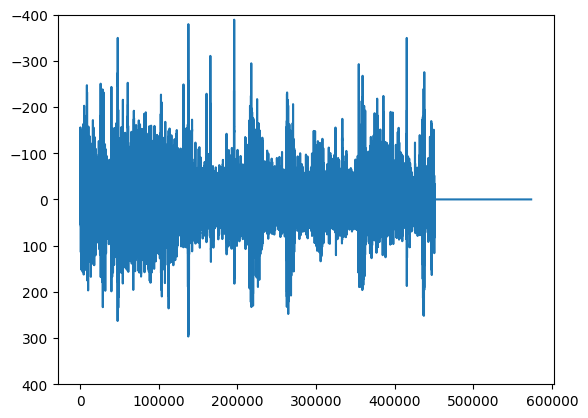

In [12]:
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

In [13]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [14]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

(0.0, 100.0)

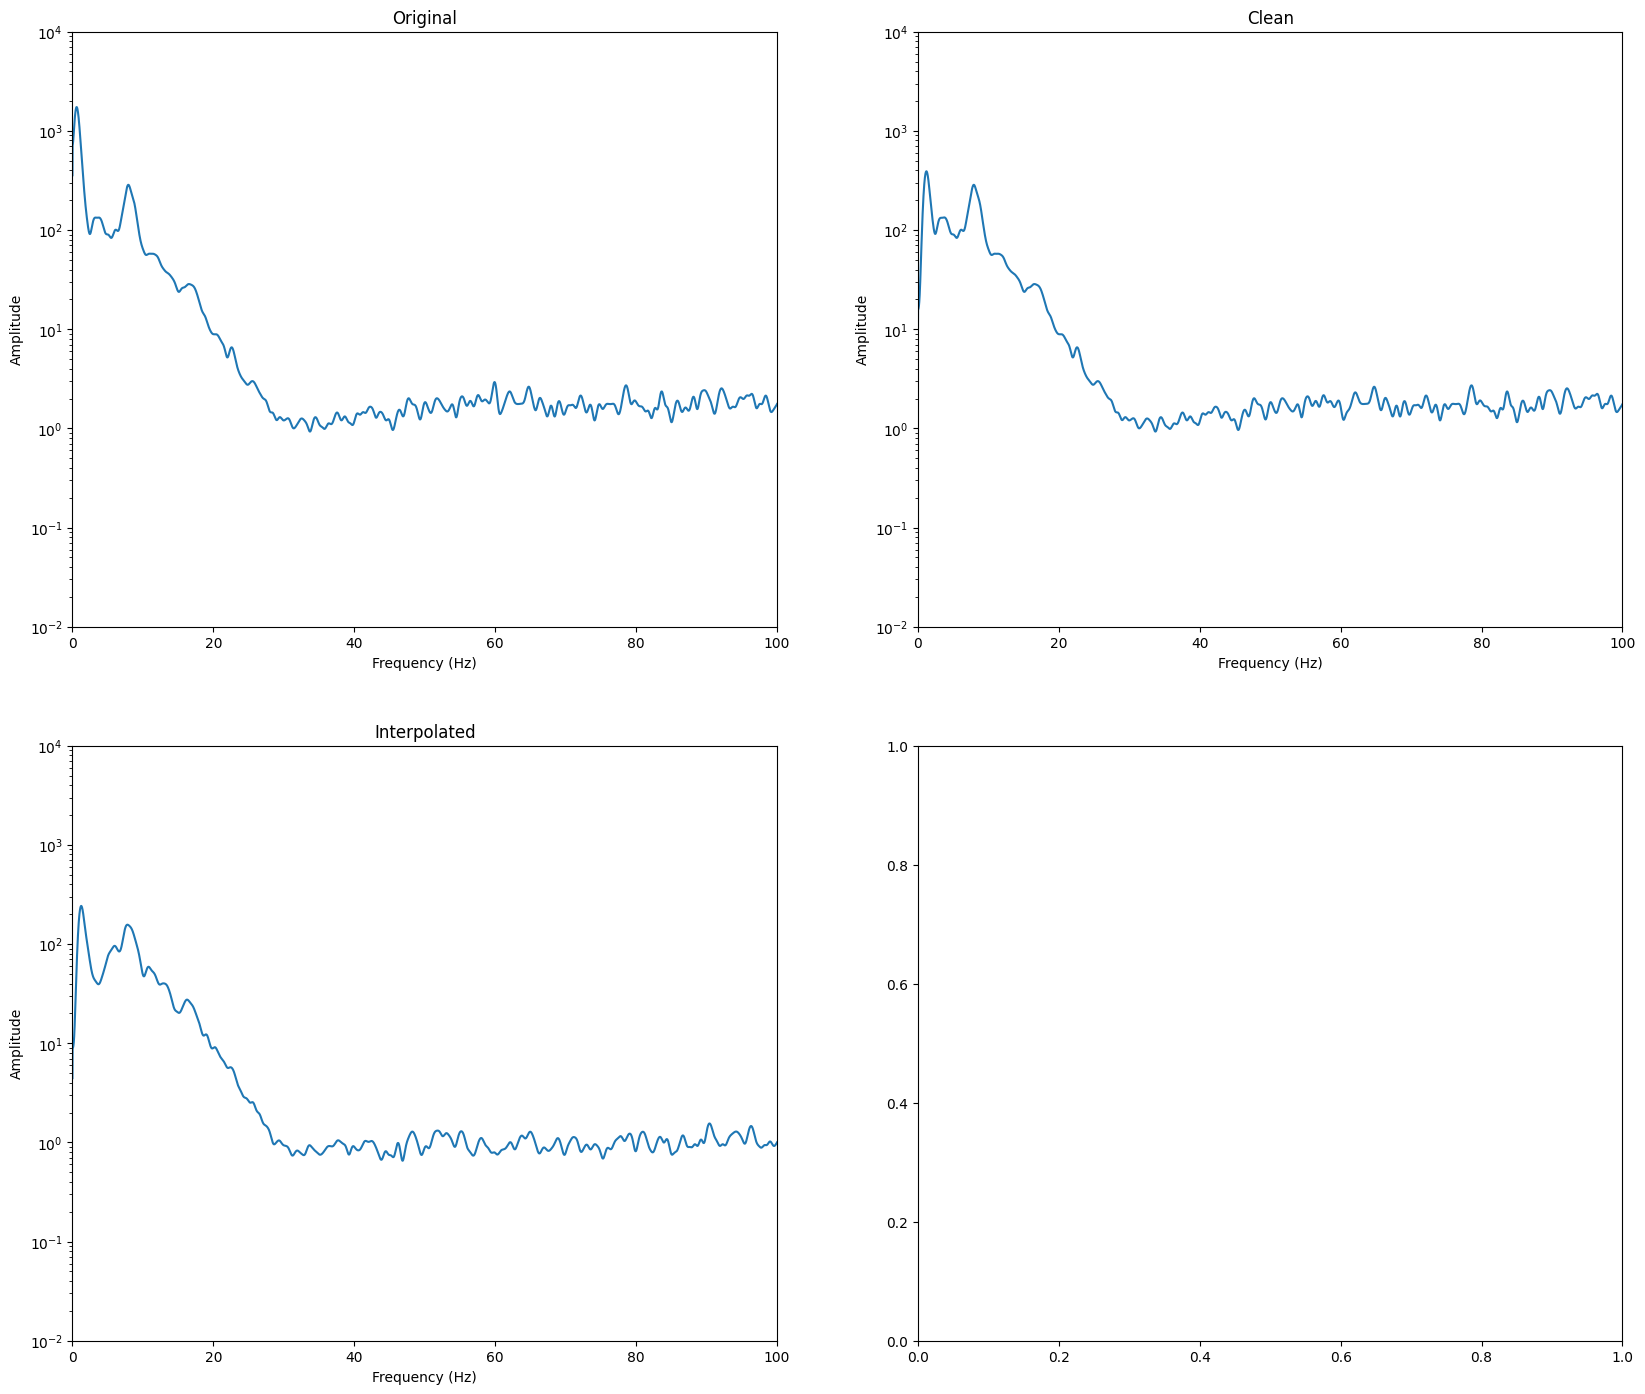

In [15]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

In [16]:
edf_in.close()

## Using Notch filtering

In [4]:
# Testing class with notch filtering
seegTF = cleanSEEG(edf_path, 
                   chn_csv_path, 
                   subject, 
                   subjects_dir, 
                   cleanPLI = True, 
                   methodPLI = 'NotchFilter', 
                   lineFreq = 60,
                   bandwidth = 4,
                   noiseDetect = True,
                   highpass = [0.25, 0.75], 
                   maxFlatlineDuration = 5, 
                   trsfPath=trsfPath, # This is the only one I'm changing from default 
                   epoch_length=5,
                   processes = 2)

In [5]:
clean, interpolated, df_epochs = seegTF.clean_epochs(return_interpolated=True)

491521
Removing line noise
PLI removal completed.
(80, 491521)
Removing drifts
(80, 491521)
Running autoreject
Start transforming mri to head
<Transform | MRI (surface RAS)->head>
[[ 0.99522067  0.03380816 -0.09161239 -0.00202999]
 [-0.03087106  0.99896884  0.03329013  0.02576594]
 [ 0.0926434  -0.03030285  0.99523813  0.04037436]
 [ 0.          0.          0.          1.        ]]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Running autoreject on ch_type=seeg


/local/mcesped.4154262.0/tmp/kslurm-venv-cl0s2j9u/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Creating augmented epochs : 80/80 [00:00<00:00,   87.31it/s]
100%|██████████| Computing thresholds ... : 80/80 [02:15<00:00,    1.69s/it]


  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  2%|▏         | Repairing epochs : 1/48 [00:00<00:00,   57.48it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,   56.26it/s]

  6%|▋         | Repairing epochs : 3/48 [00:00<00:00,   57.67it/s]

 10%|█         | Repairing epochs : 5/48 [00:00<00:00,   64.41it/s]

 15%|█▍        | Repairing epochs : 7/48 [00:00<00:00,   69.13it/s]

 19%|█▉        | Repairing epochs : 9/48 [00:00<00:00,   72.36it/s]

 23%|██▎       | Repairing epochs : 11/48 [00:00<00:00,   73.34it/s]

 27%|██▋   





Estimated consensus=0.60 and n_interpolate=4




  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  2%|▏         | Repairing epochs : 1/48 [00:00<00:00,   53.89it/s]

  4%|▍         | Repairing epochs : 2/48 [00:00<00:00,   53.28it/s]

  6%|▋         | Repairing epochs : 3/48 [00:00<00:00,   53.63it/s]

  8%|▊         | Repairing epochs : 4/48 [00:00<00:00,   53.37it/s]

 12%|█▎        | Repairing epochs : 6/48 [00:00<00:00,   62.42it/s]

 17%|█▋        | Repairing epochs : 8/48 [00:00<00:00,   68.23it/s]

 21%|██        | Repairing epochs : 10/48 [00:00<00:00,   69.18it/s]

 25%|██▌       | Repairing epochs : 12/48 [00:00<00:00,   70.88it/s]

 29%|██▉       | Repairing epochs : 14/48 [00:00<00:00,   72.24it/s]

 33%|███▎      | Repairing epochs : 16/48 [00:00<00:00,   74.67it/s]

 38%|███▊      | Repairing epochs : 18/48 [00:00<00:00,   76.70it/s]

 42%|████▏     | Repairing epochs : 20/48 [00:00<00:00,   78.51it/s]

 46%|████▌     | Repairing epochs : 22/48 [00:00<00:00,   80.04it/s]

 50%|█████     | Repairing ep

Dropped 4 epochs: 10, 11, 23, 33
(44, 80, 10240)
(80, 614528)
(80, 614528)


In [6]:
df_epochs

,Epoch #,Start ID,End ID,LMiLs1,LMiLs2,LMiLs3,LMiLs4,LMiLs5,LMiLs6,LMiLs7,...,RSLs1,RSLs2,RSLs3,RSLs4,RSLs5,RSLs6,RSLs7,RSLs8,RSLs9,RSLs10
0,1,0,10240,C,C,C,C,C,C,C,...,C,C,C,C,C,N,N,C,C,N
1,2,10240,20480,C,C,C,C,C,C,C,...,C,C,C,C,C,N,C,C,C,C
2,3,20480,30720,N,C,C,C,C,C,C,...,C,C,C,C,C,N,N,C,C,N
3,4,30720,40960,C,C,C,C,C,C,C,...,C,C,C,C,C,N,N,C,C,N
4,5,40960,51200,N,C,C,C,C,C,C,...,N,C,N,C,C,N,N,C,C,N
5,6,51200,61440,C,C,C,C,C,C,C,...,C,C,C,C,C,C,N,C,C,C
6,7,61440,71680,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
7,8,71680,81920,C,C,C,C,C,C,C,...,C,C,C,C,C,N,N,C,C,N
8,9,81920,92160,C,C,C,C,C,C,C,...,C,C,C,C,N,N,N,C,C,N
9,10,92160,102400,C,C,C,C,C,C,C,...,C,C,C,C,C,C,N,C,C,N


In [7]:
clean.shape #491521

(80, 614528)

In [8]:
interpolated.shape

(80, 573568)

In [9]:
srate = 2048.0
614528 - int(srate*5)*4

573568

In [10]:
# Compare to orig signal
import pyedflib
edf_in = pyedflib.EdfReader('/home/mcesped/scratch/HippiEEGAtlas/epochs/results/sub-079/ses-002/ieeg/epoch.edf')


In [11]:
edf_in.getSignalLabels()[0:3]

['Patient Event', 'LMiLs1', 'LMiLs2']

(400.0, -400.0)

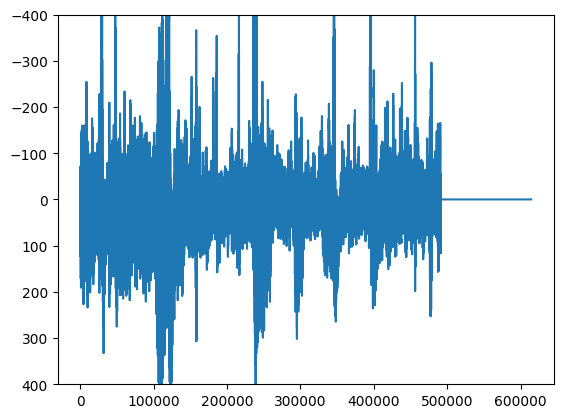

In [13]:
import matplotlib.pyplot as plt
chn_sig = edf_in.readSignal(1)
plt.plot(chn_sig)
plt.ylim([400,-400])

(400.0, -400.0)

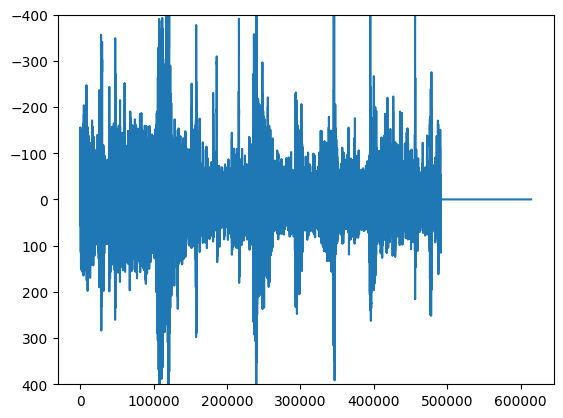

In [14]:
import matplotlib.pyplot as plt
plt.plot(clean[0,:])
plt.ylim([400,-400])

(400.0, -400.0)

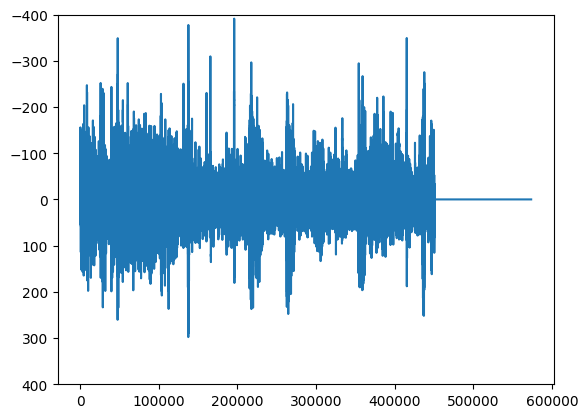

In [15]:
import matplotlib.pyplot as plt
plt.plot(interpolated[0,:])
plt.ylim([400,-400])

In [17]:
## Python's welch
import numpy as np
import scipy.io as sio
import scipy.fftpack
import scipy.signal
# create Hann window
winsize = int( 2*srate ) # 2-second window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

# number of FFT points (frequency resolution)
nfft = srate*100

In [18]:
# Find spectrums
f_orig, power_orig = scipy.signal.welch(chn_sig,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_clean, power_clean = scipy.signal.welch(clean[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)
f_int, power_int = scipy.signal.welch(interpolated[0,:],fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

(0.0, 100.0)

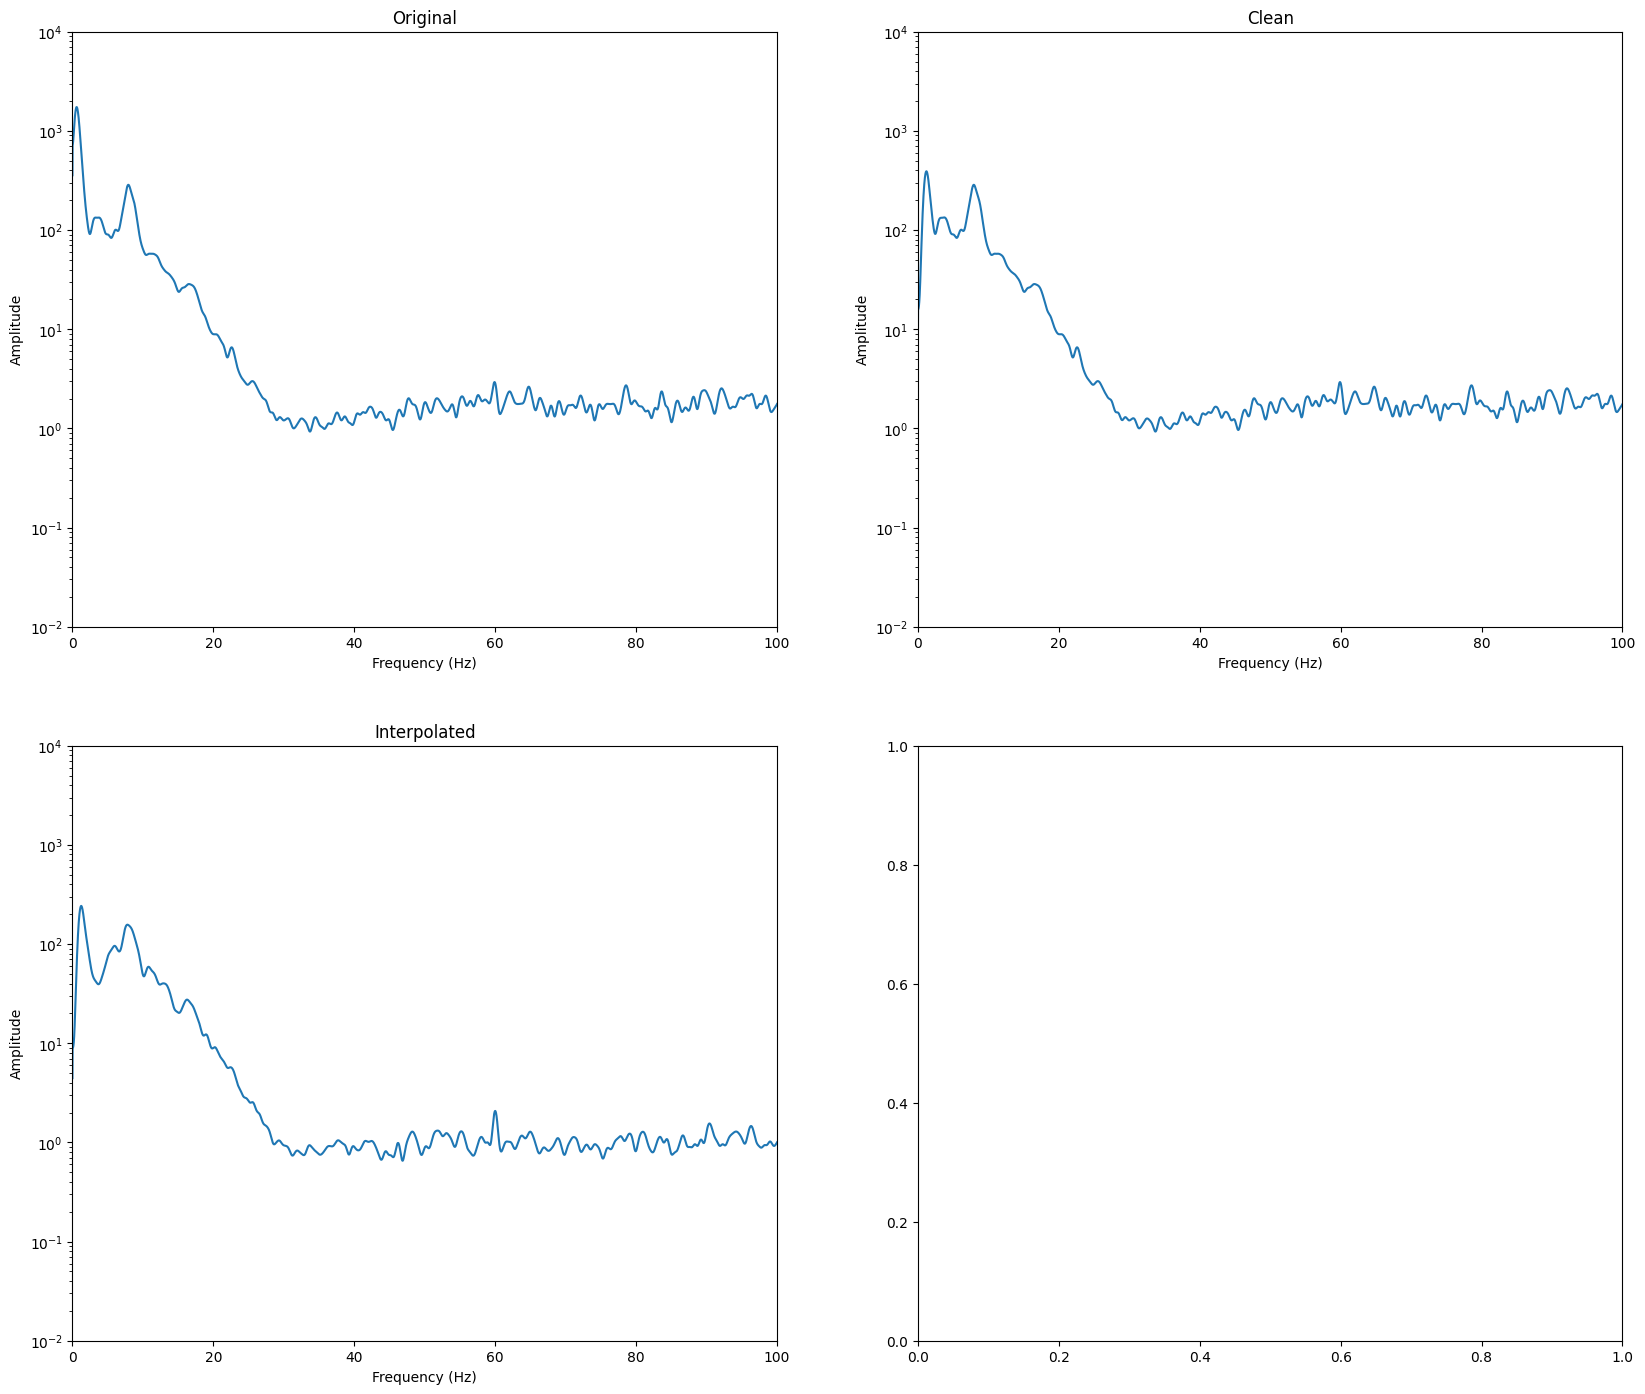

In [21]:
# With original noisy signal
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
# axs[0,0].plot(f_orig,10*np.log10(power_orig))
axs[0,0].semilogy(f_orig, power_orig)
axs[0,0].set_title('Original')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylabel('Amplitude')
axs[0,0].set_ylim([10**-2,10**4])
axs[0,0].set_xlim([0,100])

# axs[0,1].plot(f_clean,10*np.log10(power_clean))
axs[0,1].semilogy(f_clean, power_clean)
axs[0,1].set_title('Clean')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,1].set_ylabel('Amplitude')
axs[0,1].set_ylim([10**-2,10**4])
axs[0,1].set_xlim([0,100])

# axs[1,0].plot(f_int,10*np.log10(power_int))
axs[1,0].semilogy(f_int, power_int)
axs[1,0].set_title('Interpolated')
axs[1,0].set_xlabel('Frequency (Hz)')
axs[1,0].set_ylabel('Amplitude')
axs[1,0].set_ylim([10**-2,10**4])
axs[1,0].set_xlim([0,100])

# Extra

In [ ]:
a = np.array([1,2, 3])
b = np.array([0,4,5])
a < b

array([False,  True,  True])

In [ ]:
import psutil
psutil.virtual_memory()

svmem(total=13616332800, available=12602802176, percent=7.4, used=718704640, free=10122727424, active=778911744, inactive=2490535936, buffers=357003264, cached=2417897472, shared=1331200, slab=158765056)

In [ ]:
avail_mem = psutil.virtual_memory()[1]

In [ ]:
ns = 1000000000000
nc = 64
blocksize = 10
req_mem = nc*nc*16*(ns+blocksize)/blocksize
print(req_mem)
print(avail_mem)

6553600000065536.0
12601036800


In [ ]:
if req_mem>avail_mem:
        # Recalculate the blocksize
        blocksize = int(-(16*nc*nc*ns)/(16*nc*nc - avail_mem*0.8))
blocksize

6501094

In [ ]:
req_mem = nc*nc*16*(ns+blocksize)/blocksize
print(req_mem)
print(avail_mem)

10080830404.189877
12601036800
